Titanic

In [1]:
#1- Projenin amacını ve içeriğini anlama
#2- Veriyi oku ve incele
#3- veri manipulasyonları , boş verileri doldurma, kullanılacak sütunları seçme, veri tiplerini değiştirme
#4- future engineering
#5- datayı x ve y olarak ayır (regression, classification) olarak ayır (clustering)
#6- modeli eğit ve tahmin (fit predict)

In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv('ttrain.csv')

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2=pd.read_csv('ttest.csv')

In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df=pd.concat([df1,df2])

In [8]:
df.shape

(1309, 12)

In [9]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df['Fare'].mean(),df['Fare'].max(),df['Fare'].min(),df['Fare'].std()

(33.29547928134557, 512.3292, 0.0, 51.75866823917414)

In [11]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
7.7417      1
8.1583      1
8.4583      1
7.8000      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [12]:
df['Fare'].fillna(df['Fare'].min(),inplace=True)

/var/folders/7w/sfqhq6jd47gg5c2xyhv9229w0000gn/T/ipykernel_1416/1230701206.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].min(),inplace=True)


In [13]:
import seaborn as sns

<Axes: xlabel='count', ylabel='Embarked'>

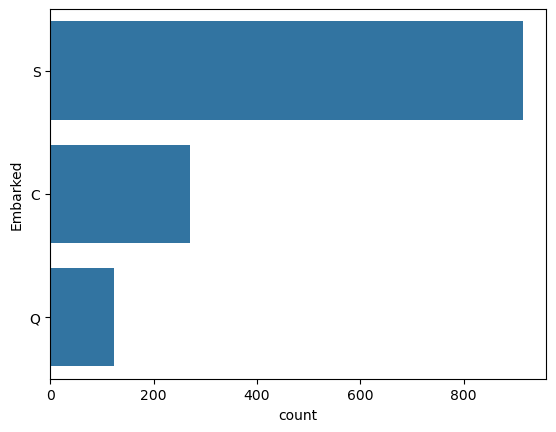

In [14]:
sns.countplot(df['Embarked'])

In [15]:
df['Embarked']=df['Embarked'].fillna('S')

In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
df.shape

(1309, 12)

In [18]:
del df['Cabin']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [20]:
df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/var/folders/7w/sfqhq6jd47gg5c2xyhv9229w0000gn/T/ipykernel_1416/4044821732.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title']=df['Name'].str.extract(' ([A-Za-z]+)\.',expand=True)


In [21]:
df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [22]:
# Doldurma şekilleri -mod median mean -silmek - başka sınıflardan yardım larak doldurma -kara ağacı ile doldurmak

In [23]:
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')

In [24]:
df['Title']=df['Title'].replace(['Mme','Countless','Lady','Dona'],'Mrs')

In [25]:
df['Title']=df['Title'].replace(['Dr','Major','Col','Sir','Rev','Jonkheer','Capt','Don'],'Mr')

In [26]:
df=df.drop('Name', axis=1)

In [27]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Title'],
      dtype='object')

In [28]:
df['Age']=df['Age'].fillna(df.groupby('Title')['Age'].transform('median'))

In [29]:
df['Age'].mean()

29.55818945760122

In [30]:
master=df[df['Title']=='Master']

In [31]:
master['Age'].mean()

5.2881967213114764

In [32]:
master

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
7,8,0.0,3,male,2.0,3,1,349909,21.0750,S,Master
16,17,0.0,3,male,2.0,4,1,382652,29.1250,Q,Master
50,51,0.0,3,male,7.0,4,1,3101295,39.6875,S,Master
59,60,0.0,3,male,11.0,5,2,CA 2144,46.9000,S,Master
63,64,0.0,3,male,4.0,3,2,347088,27.9000,S,Master
...,...,...,...,...,...,...,...,...,...,...,...
360,1252,NaN,3,male,14.5,8,2,CA. 2343,69.5500,S,Master
379,1271,NaN,3,male,5.0,4,2,347077,31.3875,S,Master
389,1281,NaN,3,male,6.0,3,1,349909,21.0750,S,Master
392,1284,NaN,3,male,13.0,0,2,C.A. 2673,20.2500,S,Master


In [33]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [34]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.024358,-0.055224,0.008942,0.030905
Survived,-0.005007,1.000000,-0.338481,-0.075129,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.386648,0.060832,0.018322,-0.558803
Age,0.024358,-0.075129,-0.386648,1.000000,-0.216195,-0.132129,0.176271
SibSp,-0.055224,-0.035322,0.060832,-0.216195,1.000000,0.373587,0.160434
Parch,0.008942,0.081629,0.018322,-0.132129,0.373587,1.000000,0.221706
Fare,0.030905,0.257307,-0.558803,0.176271,0.160434,0.221706,1.000000


In [35]:
del df['PassengerId']

In [36]:
del df['Ticket']

In [37]:
df.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
dtype: int64

In [38]:
df=pd.get_dummies(df,drop_first=True)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,True,False,True,False,False,True,False
1,1.0,1,38.0,1,0,71.2833,False,False,False,False,False,False,True
2,1.0,3,26.0,0,0,7.9250,False,False,True,False,True,False,False
3,1.0,1,35.0,1,0,53.1000,False,False,True,False,False,False,True
4,0.0,3,35.0,0,0,8.0500,True,False,True,False,False,True,False


In [41]:
train=df[:891]
test=df[891:]

In [42]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [43]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [44]:
d=DecisionTreeClassifier()

In [45]:
model=d.fit(x,y)

In [47]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,True,False,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,True,False,False,False,True
2,2,62.0,0,0,9.6875,True,True,False,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False,False,True,False
4,3,22.0,1,1,12.2875,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,30.0,0,0,8.0500,True,False,True,False,False,True,False
414,1,39.0,0,0,108.9000,False,False,False,False,False,False,True
415,3,38.5,0,0,7.2500,True,False,True,False,False,True,False
416,3,30.0,0,0,8.0500,True,False,True,False,False,True,False


In [46]:
del test['Survived']

In [48]:
tahmin=model.predict(test)

In [49]:
tahmin

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [50]:
sonuc=df2[['PassengerId']]

In [51]:
sonuc

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [52]:
sonuc['Survived']=tahmin

/var/folders/7w/sfqhq6jd47gg5c2xyhv9229w0000gn/T/ipykernel_1416/2725349856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=tahmin


In [53]:
sonuc

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,1.0
3,895,1.0
4,896,0.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


In [54]:
sonuc['Survived']=sonuc['Survived'].astype('int64')

/var/folders/7w/sfqhq6jd47gg5c2xyhv9229w0000gn/T/ipykernel_1416/4182812462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sonuc['Survived']=sonuc['Survived'].astype('int64')


In [55]:
sonuc.sample()

,PassengerId,Survived
89,981,1


In [56]:
sonuc.to_csv('titanictahmin1.csv',index=False)